In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('marketing_AB.csv')
df.set_index(df.columns[0], inplace=True)
df.index.name = None
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [4]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [5]:
# Number of unique user
df['user id'].nunique()

588101

Same as number of rows in dataframe.

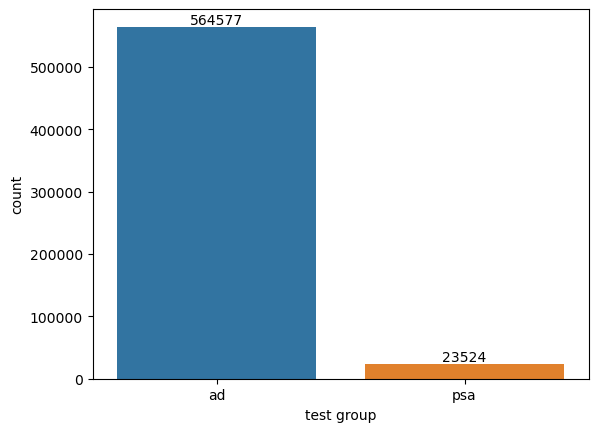

In [6]:
# Create a bar plot
ax = sns.countplot(x='test group', data=df)

# Show the count number on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

In [7]:
# Converted rate in each group
df_converted_rate = df.groupby('test group').mean('converted')
df_converted_rate

,user id,converted,total ads,most ads hour
test group,,,,
ad,1.327314e+06,0.025547,24.823365,14.475900
psa,9.117615e+05,0.017854,24.761138,14.304923


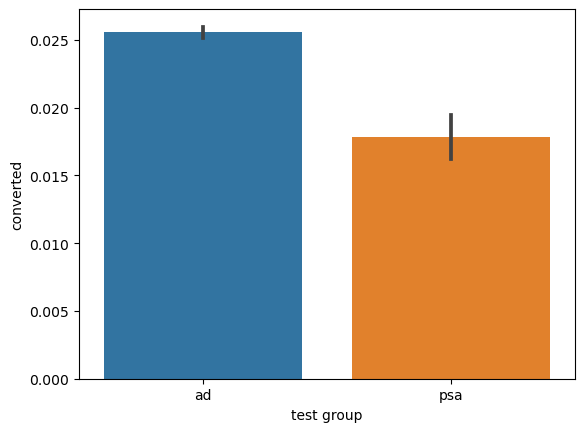

In [8]:
# Create a bar plot
ax_2 = sns.barplot(x='test group', y='converted', data=df)

In [9]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [10]:
df[df['test group'] == 'psa']

,user id,test group,converted,total ads,most ads day,most ads hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19
...,...,...,...,...,...,...
588052,900959,psa,False,16,Tuesday,22
588063,902828,psa,False,3,Tuesday,22
588066,914578,psa,False,1,Tuesday,22
588069,909042,psa,False,6,Tuesday,22


- psa users still see ads (maybe these ads are different with the ad in the campain)

<Axes: xlabel='test group', ylabel='total ads'>

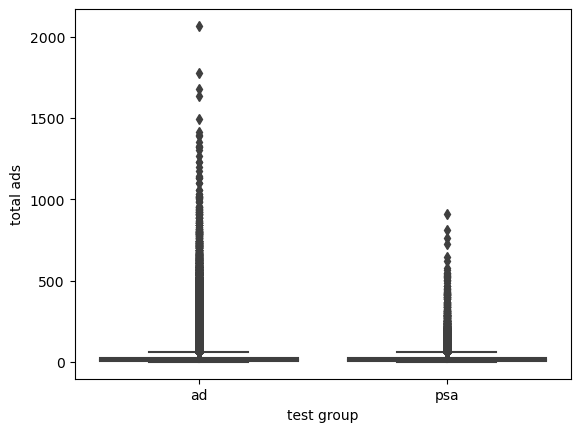

In [11]:
sns.boxplot(x='test group', y='total ads', data=df)

- There are a lot of outliers corresponding to 'total ads' feature in each group.

<Axes: xlabel='total ads', ylabel='Count'>

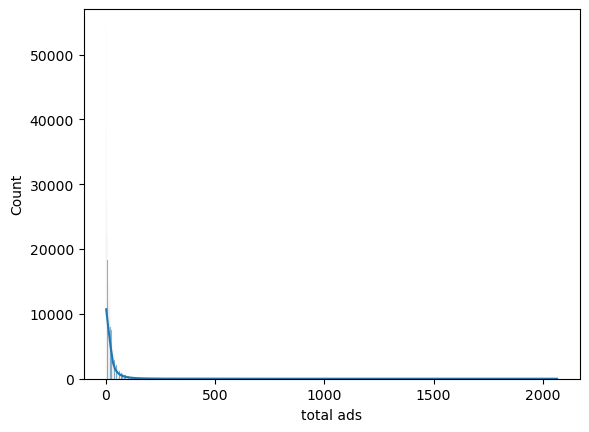

In [12]:
sns.histplot(df[df['test group'] == 'ad']['total ads'], kde=True)

In [13]:
def remove_outliers(df,value):
    """
    This function use Interquartile Range (IQR) method to remove outliers.
    Input: df <- pandas dataframe, value <- (string) column name
    """
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    df = df[(df[value] >= lower_bound) & (df[value] <= upper_bound)]
    
    return df

In [14]:
ad_group = df[df['test group'] == 'ad']
ad_group.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [15]:
psa_group = df[df['test group'] == 'psa']
psa_group.head()

,user id,test group,converted,total ads,most ads day,most ads hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19


In [16]:
ad_group_removed_outliers = remove_outliers(df=ad_group, value='total ads')
psa_group_removed_outliers = remove_outliers(df=psa_group, value='total ads')

<Axes: xlabel='total ads', ylabel='Count'>

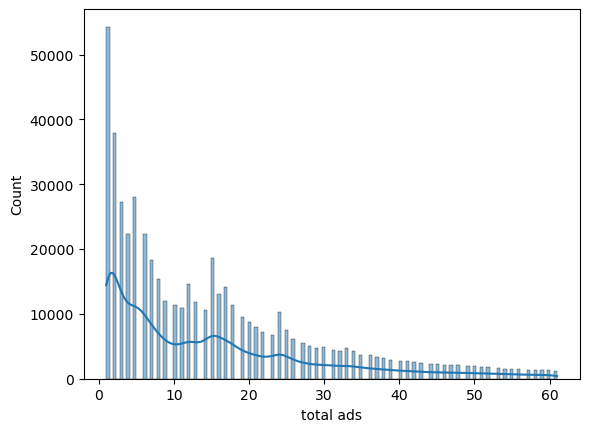

In [17]:
sns.histplot(ad_group_removed_outliers['total ads'], kde=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_13012\3678379750.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_removed_outliers = ad_group_removed_outliers.append(psa_group_removed_outliers)


<Axes: xlabel='test group', ylabel='total ads'>

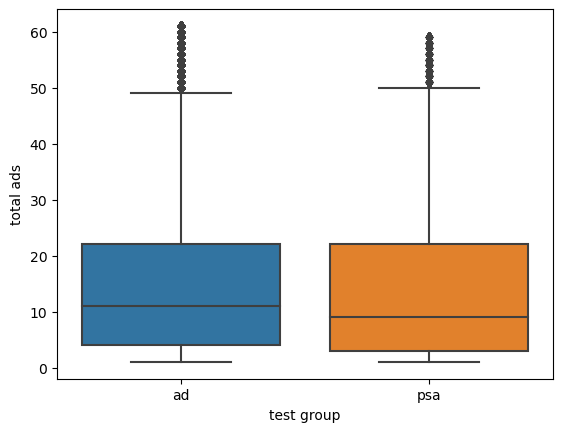

In [18]:
df_removed_outliers = ad_group_removed_outliers.append(psa_group_removed_outliers)
sns.boxplot(x='test group', y='total ads', data=df_removed_outliers)

- users in ad group seem to see more ad than users in psa group, on average.

In [19]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


<Axes: xlabel='most ads day', ylabel='count'>

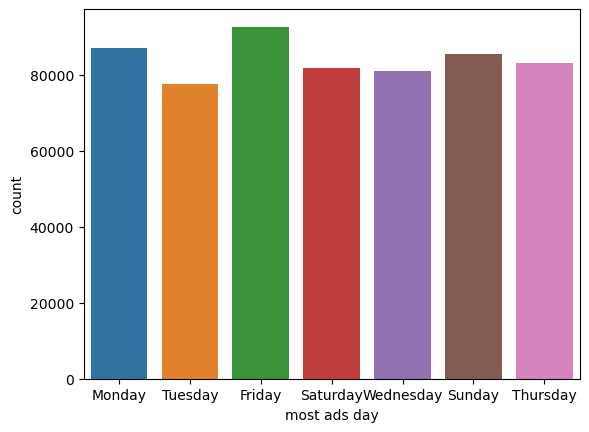

In [20]:
sns.countplot(x='most ads day', data=df)

<Axes: xlabel='most ads day', ylabel='count'>

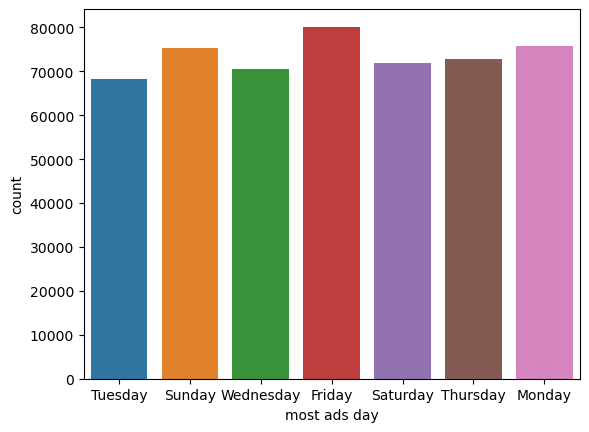

In [21]:
sns.countplot(x='most ads day', data=ad_group_removed_outliers)

<Axes: xlabel='most ads day', ylabel='count'>

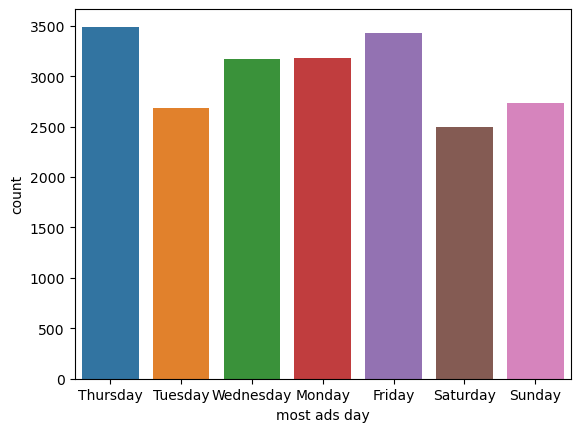

In [22]:
sns.countplot(x='most ads day', data=psa_group_removed_outliers)

# A/B Testing for Conversion Rate

In this case, we can use 2-sample independent t-test for proportion

Hypothesis Test (2-tail)
- Null Hypothesis: 2 group have the same mean.
- Alternative Hypothesis: 2 group have different mean.
- Statistic: t-statistic
- Significant Level alpha = 0.05 (probability of error type I)

In [23]:
# Check if 2 group have the same variance or not
ad_group['converted'].std()/psa_group['converted'].std()

1.1914637914015604

- This faction is in range [1/2; 2] so that we can consider 2 group have similar variance

In [24]:
from math import sqrt
# Calculate t-statistic for the test
X1_bar = ad_group['converted'].mean()
X2_bar = psa_group['converted'].mean()

n1 = len(ad_group)
n2 = len(psa_group)

s1 = ad_group['converted'].std()
s2 = psa_group['converted'].std()

# Pooled standard deviation of the two samples
s_p = sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))

# The t-statistic to test whether the means are different can be calculated as follows:
t = (X1_bar - X2_bar)/(s_p*sqrt((1/n1 + 1/n2)))
                       
print(t)

7.37040597428566


In [25]:
# Use scipy.stats
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(ad_group['converted'], psa_group['converted'], equal_var=True)
print(t_statistic, p_value)

7.37040597428566 1.7033052627831264e-13


In [26]:
# Degree of freedom
dof = n1 + n2 - 2
print(dof)

588099


In [27]:
# t value for dof = 588099 and significant level alpha = 0.05, 2-tailed
from scipy.stats import t
alpha = 0.05
t_value = t.ppf(1 - alpha/2, dof)
print(t_value)

1.9599680183439365


Our t-statistic for observed data is larger than t-value of significant level alpha -> We reject null hypothesis and accept alternative hypothesis. This mean our ad campain has statistical significant impact in the conversion rate.

## A/B Testing using Resampling (Permutation Test) technique

In [28]:
len(ad_group)

564577

In [29]:
## Permutation Test
def perm_fun(x):
    random_ad_group = x.sample(n=len(ad_group))
    random_psa_group = x[~x.isin(random_ad_group)]
    mean_diff = random_ad_group.mean() - random_psa_group.mean()
    return mean_diff

In [30]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_b = np.random.choice(n, nB, replace=False)
    idx_a = np.setdiff1d(np.arange(n), idx_b)
    mean_diff = np.mean(x[idx_b]) - np.mean(x[idx_a])
    return mean_diff

In [31]:
obs_test_statistic = ad_group['converted'].mean() - psa_group['converted'].mean()
obs_test_statistic

0.007692453192201517

In [32]:
perm_diffs = []
for i in range(1000):
    mean_diff = perm_fun(df['converted'], nA=len(ad_group), nB=len(psa_group))
    perm_diffs.append(mean_diff)

<Axes: ylabel='Count'>

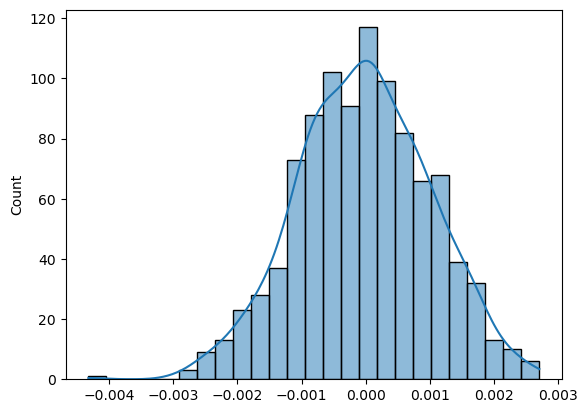

In [33]:
# Null distribution - Test statistic distribution under Null Hypothesis
sns.histplot(perm_diffs, kde=True)

In [34]:
# p-value = Pr(permutation diff >= obs_test_statistic | Null Hypothesis) = #(perm_diffs >= obs_test_statistic)/total perm_diffs
perm_diffs_greater_than_obs_stats = [x for x in perm_diffs if x > obs_test_statistic]
p_value = len(perm_diffs_greater_than_obs_stats) * 2 / len(perm_diffs)

In [35]:
p_value

0.0

p_value << alpha -> Reject null hypothesis.